In [1]:
# from zipfile import ZipFile
# def extract_zip(input_zip):
#     input_zip=ZipFile(input_zip)
#     return {name: input_zip.read(name) for name in input_zip.namelist()}

In [2]:
# zip_extract=extract_zip(r"D:\StyleGAN-Datasets\512-anime-16K.zip")

In [7]:
a = list(zip_extract.values())[0]

In [8]:
from PIL import Image
a=Image.frombytes(data=a,size=(512,512),mode="RGBA")

ValueError: not enough image data

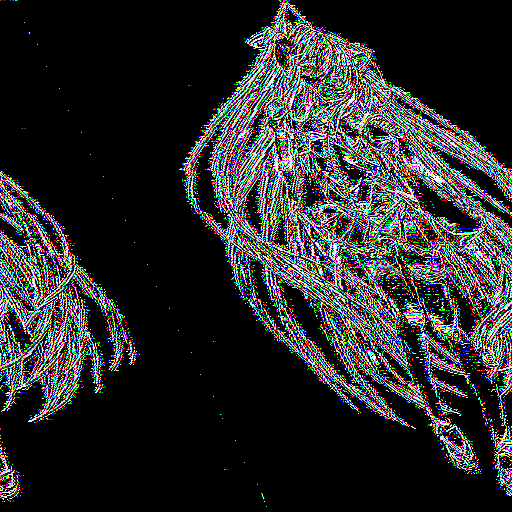

In [5]:
display(a)

In [11]:
from PIL import Image
im_arr = []
im = Image.open(r"D:\StyleGAN-Datasets\512-anime-16K\00000\img00000001.png").convert("RGB")
im1 = Image.open(r"F:\1663756580442-62bd5f951e22ec84279820e8.jpeg").convert("RGB")
im_arr.append(im)
im_arr.append(im1)

In [1]:
import torch
from lavis.models import load_model_and_preprocess
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# loads BLIP caption base model, with finetuned checkpoints on MSCOCO captioning dataset.
# this also loads the associated image processors
model, vis_processors, _ = load_model_and_preprocess(name="blip_caption", model_type="large_coco", is_eval=True, device=device)
# preprocess the image
# vis_processors stores image transforms for "train" and "eval" (validation / testing / inference)
image = vis_processors["eval"](raw_image).unsqueeze(0).to(device)
# generate caption
model.generate({"image": image})

{'name': 'blip_image_train'}
{'name': 'blip_image_eval'}
{'name': 'blip_caption', 'prompt': 'a picture of '}
{'name': 'blip_caption'}


NameError: name 'raw_image' is not defined

In [1]:
# from pathlib import Path

# extensions = ['.jpg', '.png', '.jpeg']
# images = [x for x in Path(r"D:\StyleGAN-Datasets\512-anime-16K").iterdir() if x.suffix.lower() in extensions]
# print(images)

[]


In [1]:
import glob
from PIL import Image
im_arr= glob.glob(r"D:\StyleGAN-Datasets\512-anime-16K\**\*.png",recursive=True)

In [2]:
from joblib import Parallel, delayed
import multiprocessing
import numpy as np

def processInput(i):
    return {i:Image.open(i).convert("RGB")}

num_cores = multiprocessing.cpu_count()
results = Parallel(n_jobs=num_cores)(delayed(processInput)(i) for i in im_arr)

In [3]:
results = sorted(results, key=lambda d: list(d.keys())) 

In [4]:
results = np.array_split(np.asarray([item for sublist in [list(result.values()) for result in results] for item in sublist]),500)

c:\Users\Aravind\anaconda3\envs\lit\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The input object of type 'Image' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Image', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  """Entry point for launching an IPython kernel.
c:\Users\Aravind\anaconda3\envs\lit\lib\site-packages\ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  """Entry point for launching an IPython kernel.


In [6]:
np.save(r"C:\Users\Aravind\Desktop\dog.npy",results)

c:\Users\Aravind\anaconda3\envs\lit\lib\site-packages\numpy\lib\npyio.py:528: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = np.asanyarray(arr)


In [ ]:
# import torch
# from lavis.models import load_model_and_preprocess
# from tqdm.notebook import tqdm
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# device = "cpu"
# # # loads BLIP caption base model, with finetuned checkpoints on MSCOCO captioning dataset.
# # # this also loads the associated image processors
# model, vis_processors, _ = load_model_and_preprocess(name="blip_caption", model_type="large_coco", is_eval=True, device=device)
# # preprocess the image
# # vis_processors stores image transforms for "train" and "eval" (validation / testing / inference)
# ims = []
# for count,im in tqdm(enumerate(im_arr)):
#     print(count)
#     if count != 0:
#         image = vis_processors["eval"](im).unsqueeze(0).to(device)
#         x = torch.cat((x,image),0)
#     else:
#         x = vis_processors["eval"](im).unsqueeze(0).to(device)
# # generate caption
# prompts = model.generate({"image": x})

In [11]:
torch.cuda.empty_cache()
#prompts = model.generate({"image": x})

In [1]:
import numpy as np
results = np.load(r"C:\Users\Aravind\Desktop\dog.npy",allow_pickle=True)

In [2]:
print(len(results[0]))

21


In [ ]:
import torch
from lavis.models import load_model_and_preprocess
from tqdm.notebook import tqdm
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# # loads BLIP caption base model, with finetuned checkpoints on MSCOCO captioning dataset.
# # this also loads the associated image processors
_, vis_processors, _ = load_model_and_preprocess(name="blip_caption", model_type="large_coco", is_eval=True, device=device)
x=None
y=[]
for counts,ims in tqdm(enumerate(results),total=len(results)):
    for count,im in enumerate(ims):
        if count != 0:
            image = vis_processors["eval"](im).unsqueeze(0).to("cpu")
            x = torch.cat((x,image),0)
        else:
            x = vis_processors["eval"](im).unsqueeze(0).to("cpu")
        
    x = x.cpu()
    y.append(x)
    del x
    x = None
# generate caption
del results

In [8]:
xb = torch.cat(y,dim=0)

In [1]:
import torch, numpy as np
xb = torch.load("tensor_x.pt")
xb = xb.numpy()
xb = np.array_split(xb,1682)

In [2]:
len(xb[-1])

5

In [4]:
from lavis.models import load_model_and_preprocess
from tqdm.notebook import tqdm
prompt_Arr = []
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model, _, _ = load_model_and_preprocess(name="blip_caption", model_type="large_coco", is_eval=True, device=device)
pts = []
for count,x in tqdm(enumerate(xb),total=len(xb)):
    image = torch.tensor(x).to("cuda")
    prompts = model.generate({"image": image})
    pts.append(prompts)
    del prompts
    del image

{'name': 'blip_image_train'}
{'name': 'blip_image_eval'}
{'name': 'blip_caption', 'prompt': 'a picture of '}
{'name': 'blip_caption'}


  0%|          | 0/1682 [00:00<?, ?it/s]

In [7]:
#print(pts)
a = sum(pts,[])

In [12]:
import pickle
with open("text.pkl","wb+") as f:
    pickle.dump(a,f)

In [1]:
from PIL import Image
im = Image.open(r"C:\Users\Aravind\Desktop\FZzWQd6XgAE_FQ6.png").convert("RGB")
im1 = im.tobytes("xbm", "rgb")

In [4]:
print(type(im1))

<class 'bytes'>


In [ ]:
a = {"lambdalabs--pokemon-blip-captions": 
{"description": "", "citation": "", "homepage": "", "license": "", "features": 
{"image": {"decode": true, "id": null, "_type": "Image"}, "text": {"dtype": "string", "id": null, "_type": "Value"}}, 
    "post_processed": null, "supervised_keys": null, "task_templates": null, "builder_name": "imagefolder", "config_name": "pokemon", "version": 
        {"version_str": "0.0.0", "description": null, "major": 0, "minor": 0, "patch": 0}, "splits": 
            {"train": {"name": "train", "num_bytes": 119417410.0, "num_examples": 833, "dataset_name": "pokemon-blip-captions"}}, 
                "download_checksums": null, "download_size": 99672355, "post_processing_size": null, "dataset_size": 119417410.0, "size_in_bytes": 219089765.0}}

In [7]:
import datasets
from datasets import *
class TextAnime(datasets.GeneratorBasedBuilder):

    def _info(self) -> DatasetInfo:
        return datasets.DatasetInfo(
            description=_DESCRIPTION,
            features=datasets.Features(
                {
                    "
                    "text": datasets.Value("string"),
                }
            ),
            supervised_keys=None,
            homepage=_HOMEPAGE,
            citation="",
        )

    def _split_generators(self, dl_manager: DownloadManager):
        downloaded_files = dl_manager.download_and_extract(_URLS)
        return [datasets.SplitGenerator(name=datasets.Split.TRAIN, gen_kwargs={"filepath": downloaded_files})]

    def _generate_examples(self, filepath):
        for path in filepath:
            all_fnames = {os.path.relpath(os.path.join(root, fname), start=path)
                          for root, _dirs, files in os.walk(path) for fname in files}
            image_fnames = sorted(fname for fname in all_fnames
                                  if os.path.splitext(fname)[1].lower() in PIL.Image.EXTENSION)
            for image_fname in image_fnames:
                yield image_fname, {"image": os.path.join(path, image_fname)}

In [25]:
%%writefile test.py
import datasets
from datasets import *
import os
import PIL
_DESCRIPTION = """
FBAnimeHQ is a dataset with high-quality full-body anime girl images in a resolution of 1024 × 512.
"""
_HOMEPAGE = "https://huggingface.co/datasets/skytnt/fbanimehq"
_URL_BASE = "https://huggingface.co/datasets/skytnt/fbanimehq/resolve/main/data/"
_URLS = [
    _URL_BASE + "fbanimehq-00.zip",
    _URL_BASE + "fbanimehq-01.zip",
    _URL_BASE + "fbanimehq-02.zip",
    _URL_BASE + "fbanimehq-03.zip",
    _URL_BASE + "fbanimehq-04.zip",
]
class TextAnime(datasets.GeneratorBasedBuilder):

    def _info(self) -> DatasetInfo:
        return datasets.DatasetInfo(
            description= 'Helo',
            features=datasets.Features(
                {
                    "image": datasets.Image(),
                    "text": datasets.Value("string"),
                }
            ),
            supervised_keys=None,
            citation="",
        )

    def _split_generators(self, dl_manager: DownloadManager):
        # downloaded_files = dl_manager.download_and_extract(_URLS)
        # return [datasets.SplitGenerator(name=datasets.Split.TRAIN, gen_kwargs={"filepath": downloaded_files})]
        pass

    def _generate_examples(self, filepath):
        for path in filepath:
            all_fnames = {os.path.relpath(os.path.join(root, fname), start=path)
                          for root, _dirs, files in os.walk(path) for fname in files}
            image_fnames = sorted(fname for fname in all_fnames
                                  if os.path.splitext(fname)[1].lower() in PIL.Image.EXTENSION)
            for image_fname in image_fnames:
                yield image_fname, {"image": os.path.join(path, image_fname)}

Overwriting test.py


In [26]:
!datasets-cli test "C:\Users\Aravind\Desktop\test.py" --save_infos --all_configs

Testing builder 'default' (1/1)


Using custom data configuration default
Traceback (most recent call last):
  File "C:\Users\Aravind\anaconda3\envs\lit\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\Aravind\anaconda3\envs\lit\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\Aravind\anaconda3\envs\lit\Scripts\datasets-cli.exe\__main__.py", line 7, in <module>
  File "C:\Users\Aravind\anaconda3\envs\lit\lib\site-packages\datasets\commands\datasets_cli.py", line 39, in main
    service.run()
  File "C:\Users\Aravind\anaconda3\envs\lit\lib\site-packages\datasets\commands\test.py", line 142, in run
    try_from_hf_gcs=False,
  File "C:\Users\Aravind\anaconda3\envs\lit\lib\site-packages\datasets\builder.py", line 811, in download_and_prepare
    **download_and_prepare_kwargs,
  File "C:\Users\Aravind\anaconda3\envs\lit\lib\site-packages\datasets\builder.py", line 1417, in _download_and_prepare
    dl_manager, verify_infos, check_duplicate_keys=veri

In [8]:
from datasets import load_dataset_builder
ds_builder = load_dataset_builder("TextAnime")
ds_builder.info

FileNotFoundError: Couldn't find a dataset script at c:\Users\Aravind\Desktop\TextAnime\TextAnime.py or any data file in the same directory. Couldn't find 'TextAnime' on the Hugging Face Hub either: FileNotFoundError: Dataset 'TextAnime' doesn't exist on the Hub. If the repo is private, make sure you are authenticated with `use_auth_token=True` after logging in with `huggingface-cli login`.

In [9]:
import pickle, numpy as np
results = np.load(r"C:\Users\Aravind\Desktop\dog.npy",allow_pickle=True)
with open("text.pkl","rb") as f:
    fs = pickle.load(f)


In [10]:
arr = []
for items in results:
    arr.append(items.tolist())

In [11]:
results = sum(arr,[])

In [12]:
im_dict = dict(zip(["img" + str(i).rjust(8,"0") for i in range(10036)],list(zip(results,fs))))

In [13]:
im_dict = {
    "image":results,
    "text":fs
}

In [81]:
!pip install pandas pyarrow

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com


In [82]:
import pandas as pd
psd = pd.DataFrame(im_dict)

In [109]:
from datasets import Image
img_dict={"image":[],"text":[]}
feature = Image()
# assuming image is a Pillow image
for i in range(10036):
    img_dict['image'].append(feature.encode_example(im_dict["image"][i]))

In [127]:
from datasets import Value
fsh = Value(dtype="string")

In [128]:
for i in range(10036):
    img_dict['text'].append(fsh.encode_example(im_dict["text"][i]))

In [136]:
import pandas as pd
psd = pd.DataFrame(img_dict)

In [143]:
with open("psd.pkl", "wb+") as f:
    pickle.dump(psd,f)

In [137]:
psd.to_parquet('psd.parquet',
              compression='brotli')  

In [144]:
from datasets import Dataset
img = feature.decode_ple(img_dict['image'][0])

In [14]:
dataset = Dataset.from_dict(im_dict)

In [15]:
print(dataset)

Dataset({
    features: ['image', 'text'],
    num_rows: 10036
})


In [17]:
dataset.save_to_disk("anime")

In [18]:
from datasets import *
ds = load_from_disk(r"C:\Users\Aravind\Desktop\anime")

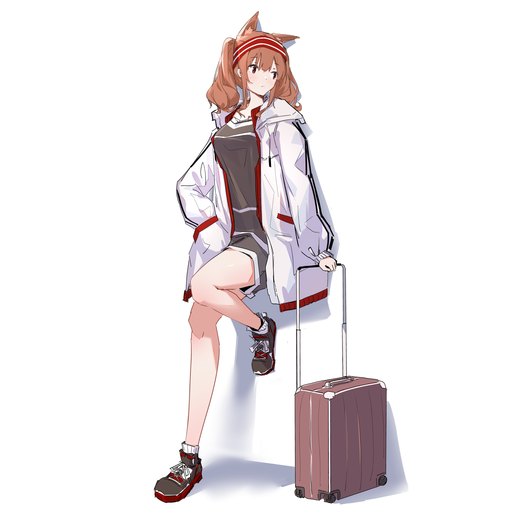

In [20]:
sam = ds[1]
display(sam["image"])

In [1]:
from loguru import logger
from PicImageSearch import Iqdb, Network


async with Network() as client:  # 可以设置代理 Network(proxies='scheme://host:port')
    saucenao = Iqdb()  # client, api_key 不能少
    url = "https://raw.githubusercontent.com/kitUIN/PicImageSearch/main/demo/images/test01.jpg"
    
    file = r"D:\StyleGAN-Datasets\512-anime-16K\images\00000\img00000005.png"
    #resp = await saucenao.search(url=url)
    resp = await saucenao.search(file=file)
    # 搜索本地图片
    # file = "demo/images/test01.jpg"
    # resp = await saucenao.search(file=file)

    #logger.info(resp.status_code)  # HTTP 状态码
    logger.info(resp.origin)  # 原始数据
    logger.info(resp.raw[1].origin)
    # logger.info(resp.long_remaining)
    # logger.info(resp.short_remaining)
    # logger.info(resp.raw[0].thumbnail)
    # logger.info(resp.raw[0].similarity)
    # logger.info(resp.raw[0].hidden)
    # logger.info(resp.raw[0].title)
    # logger.info(resp.raw[0].author)
    # logger.info(resp.raw[0].url)
    # logger.info(resp.raw[0].pixiv_id)
    # logger.info(resp.raw[0].member_id)
    logger.info(resp)

2022-09-26 17:42:23.787 | INFO     | __main__:async-def-wrapper:20 - <html><head><title>Multi-service image search - Search results</title>
<style type="text/css">&lt;!--
.list table { width: 100%; margin: 3px; padding: 3px; border: 1px solid black; }
.pages div { display: inline-block; vertical-align: top; }
.pages table { width: 162px; border: 1px solid black; text-align: center; margin: 0.5ex 0ex 0.5ex 0ex; table-layout: fixed; }
.pages .nomatch table { width: 312px; max-width: none; }
.pages td { max-width: 154px; word-wrap: break-word; overflow: hidden; }
td.image { width: 154px; height: 154px; text-align: center; margin-left: auto; margin-right: auto; vertical-align: middle; overflow: visible; }
.flow { max-width: 30em; }
.err { color: red; font-weight: bold; }
.em { font-weight: bold; }
.el { white-space: nowrap; }
--&gt;</style>
<link href="/default.css" media="screen" rel="Stylesheet" type="text/css"/>
<style type="text/css">&lt;!--
table.form th { text-align: left; }
img.serv

In [9]:
from bs4 import BeautifulSoup
s = str(resp.raw[1].origin)
soup = BeautifulSoup(s, 'html.parser')
print(soup)

<table><tr><th>Possible match</th></tr><tr><td class="image"><a href="https://yande.re/post/show/942178"><img alt="Rating: s Score: 9 Tags: angel animal_ears blue_archive ju-ok nekomimi sunaookami_shiroko" height="150" src="/moe.imouto/0/6/9/06999ec045eec9bf3a8f61a09fc0f848.jpg" title="Rating: s Score: 9 Tags: angel animal_ears blue_archive ju-ok nekomimi sunaookami_shiroko" width="100"/></a></td></tr><tr><td><img alt="icon" class="service-icon" src="/icon/yandere.ico"/>yande.re</td></tr><tr><td>2000×2989 [Safe]</td></tr><tr><td>63% similarity</td></tr></table>


In [2]:
from bs4 import BeautifulSoup
s = str(resp.raw[2].origin)
soup = BeautifulSoup(s, 'html.parser')
tag = soup.img
lst = tag['alt'].split(" ")
print(lst)
indexs = lst[next((lst.index(s) for s in lst if "tag" in s.lower()), None) + 1:]
print(indexs)

['Rating:', 's', 'Tags:', 'Female,', 'Carnelian,', 'CG', 'Art,', 'Yami', 'to', 'Boushi', 'to', 'Hon', 'no', 'Tabibito,', 'Maid', 'Outfit']
['Female,', 'Carnelian,', 'CG', 'Art,', 'Yami', 'to', 'Boushi', 'to', 'Hon', 'no', 'Tabibito,', 'Maid', 'Outfit']


In [15]:
import glob
from PIL import Image
im_arr= glob.glob(r"D:\StyleGAN-Datasets\512-anime-16K\**\*.png",recursive=True)
im_arr = im_arr[652:]

In [16]:
from loguru import logger
from PicImageSearch import Iqdb, Network
from bs4 import BeautifulSoup
import time

#async def processInput(im_arr):
async with Network() as client:  # 可以设置代理 Network(proxies='scheme://host:port')
    saucenao = Iqdb()  # client, api_key 不能少
    url = "https://raw.githubusercontent.com/kitUIN/PicImageSearch/main/demo/images/test01.jpg"
    
    #file = r"D:\StyleGAN-Datasets\512-anime-16K\images\00000\img00000000.png"
    lsting = []
    
    for file in im_arr:
        try:
            print()
            print(file)
            print()
            #resp = await saucenao.search(url=url)
            resp = await saucenao.search(file=file)
            # 搜索本地图片
            # file = "demo/images/test01.jpg"
            # resp = await saucenao.search(file=file)

            #logger.info(resp.status_code)  # HTTP 状态码
            #logger.info(resp.origin)  # 原始数据
            #logger.info(resp.raw[0].origin)
            # logger.info(resp.long_remaining)
            # logger.info(resp.short_remaining)
            # logger.info(resp.raw[0].thumbnail)
            # logger.info(resp.raw[0].similarity)
            # logger.info(resp.raw[0].hidden)
            # logger.info(resp.raw[0].title)
            # logger.info(resp.raw[0].author)
            # logger.info(resp.raw[0].url)
            # logger.info(resp.raw[0].pixiv_id)
            # logger.info(resp.raw[0].member_id)
            #logger.info(resp)

            try: s = str(resp.raw[0].origin)
            except: print("error")
            soup = BeautifulSoup(s, 'html.parser')
            tag = soup.img
            try: 
                lst = tag['alt'].split(" ")
                if lst == ['[IMG]']:
                    continue
                
            except TypeError: 
                s = str(resp.raw[1].origin)
                soup = BeautifulSoup(s, 'html.parser')
                tag = soup.img
                lst = tag['alt'].split(" ")
            except: 
                continue

            try: indexs = lst[next((lst.index(s) for s in lst if "tag" in s.lower()), None) + 1:]
            except: continue

            print()
            print(indexs)
            print()
            lsting.append([indexs])
        except:
            continue



D:\StyleGAN-Datasets\512-anime-16K\images\00000\img00000652.png


['akagi_miria', 'barefoot', 'brown_eyes', 'brown_hair', 'dress', 'gradient', 'hpb8642', 'idolmaster', 'idolmaster_cinderella_girls', 'loli', 'panties', 'see_through', 'twintails', 'underwear', 'wings']


D:\StyleGAN-Datasets\512-anime-16K\images\00000\img00000653.png


['Female,', 'Dress,', 'Brown', 'Hair,', 'Blue', 'Eyes,', 'Short', 'Hair,', 'Bows', '(Fashion),', 'Original,', 'Solo,', 'Short', 'Dress,', 'PNG', 'Conversion,', 'Closed', 'Mouth,', 'Looking', 'At', 'Camera,', 'Pixiv', 'Id', '3004637']


D:\StyleGAN-Datasets\512-anime-16K\images\00000\img00000654.png


D:\StyleGAN-Datasets\512-anime-16K\images\00000\img00000655.png


['emilia', 'gray_hair', 'hewsack', 'long_hair', 'navel', 'panties', 'photoshop', 'pointed_ears', 'purple_eyes', 're:zero_kara_hajimeru_isekai_seikatsu', 'shirt_lift', 'underwear', 'white']


D:\StyleGAN-Datasets\512-anime-16K\images\00000\img00000656.png


['1girl', 'a.i._voice', 'ahoge', 'ayak

In [5]:
import numpy as np
im_arr = np.array(im_arr[::-1]).reshape(-1,2).tolist()

In [7]:
import os
import pathlib
list(pathlib.Path(directory).glob('**/*.txt'))

[WindowsPath('F:/pixivutil20220924/changelog.txt'),
 WindowsPath('F:/pixivutil20220924/Tags.txt'),
 WindowsPath('F:/pixivutil20220924/url_list_20220922.txt'),
 WindowsPath('F:/pixivutil20220924/url_list_20220923.txt'),
 WindowsPath('F:/pixivutil20220924/url_list_20220924.txt'),
 WindowsPath('F:/pixivutil20220924/url_list_20220926.txt'),
 WindowsPath('F:/pixivutil20220924/url_list_20220927.txt'),
 WindowsPath('F:/pixivutil20220924/$Leeper_zZ (51017289)/101335217_p1 - シスター戦士.txt'),
 WindowsPath('F:/pixivutil20220924/$Leeper_zZ (51017289)/101335391_p1 - ストロベリー・バフィー擬人化.txt'),
 WindowsPath('F:/pixivutil20220924/$Leeper_zZ (51017289)/99518622_p1 - 无题.txt'),
 WindowsPath('F:/pixivutil20220924/$Leeper_zZ (51017289)/99888037_p1 - 宇宙クラゲキャラクターデザイン.txt'),
 WindowsPath('F:/pixivutil20220924/$Leeper_zZ (51017289)/99888213_p0 - 自分の設定です.txt'),
 WindowsPath('F:/pixivutil20220924/&Ether (44698670)/82513554_p2 - 立绘+设计.txt'),
 WindowsPath('F:/pixivutil20220924/(Dmayr ) (41578980)/88734232_p1 - 原神诺艾尔.txt')

In [3]:
from glob import glob
import os
directory = r"F:\pixivutil20220924"
a = glob(fr"{directory}/*/*.jpg", recursive = True) + glob(fr"{directory}/*/*.png", recursive = True) + glob(fr"{directory}/*/*.jpeg", recursive = True)
a

['F:\\pixivutil20220924\\$Leeper_zZ (51017289)\\101335217_p0 - シスター戦士.jpg',
 'F:\\pixivutil20220924\\$Leeper_zZ (51017289)\\101335217_p1 - シスター戦士.jpg',
 'F:\\pixivutil20220924\\$Leeper_zZ (51017289)\\101335391_p0 - ストロベリー・バフィー擬人化.jpg',
 'F:\\pixivutil20220924\\$Leeper_zZ (51017289)\\101335391_p1 - ストロベリー・バフィー擬人化.jpg',
 'F:\\pixivutil20220924\\$Leeper_zZ (51017289)\\99518622_p0 - 无题.jpg',
 'F:\\pixivutil20220924\\$Leeper_zZ (51017289)\\99518622_p1 - 无题.jpg',
 'F:\\pixivutil20220924\\$Leeper_zZ (51017289)\\99888037_p0 - 宇宙クラゲキャラクターデザイン.jpg',
 'F:\\pixivutil20220924\\$Leeper_zZ (51017289)\\99888037_p1 - 宇宙クラゲキャラクターデザイン.jpg',
 'F:\\pixivutil20220924\\$Leeper_zZ (51017289)\\99888213_p0 - 自分の設定です.jpg',
 'F:\\pixivutil20220924\\&Ether (44698670)\\82513554_p0 - 立绘+设计.jpg',
 'F:\\pixivutil20220924\\&Ether (44698670)\\82513554_p1 - 立绘+设计.jpg',
 'F:\\pixivutil20220924\\&Ether (44698670)\\82513554_p2 - 立绘+设计.jpg',
 'F:\\pixivutil20220924\\(Dmayr ) (41578980)\\88734232_p0 - 原神诺艾尔.jpg',
 'F:\\pixivu

In [1]:
!pip install tqdm

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com


In [2]:
from glob import glob
import os
directory = r"F:\pixivoutput"
# for item in glob(fr"{directory}/*", recursive = True):
#     os.chdir(r"C:\Users\Aravind\Desktop\yolov5-master\yolov5-master")
#     print(str(item))
os.chdir(r"C:\Users\Aravind\Desktop\yolov5-master\yolov5-master")
!python detect.py --source "{directory}" --weights waifu_dect.onnx --save-crop --hide-labels --hide-conf --line-thickness 0 --imgsz=1024 --project "F:/outputdir"

^C


In [1]:
#!/usr/bin/env python3

# Copyright (C) 2021 cryzed
#
# This program is free software: you can redistribute it and/or modify
# it under the terms of the GNU Affero General Public License as
# published by the Free Software Foundation, either version 3 of the
# License, or (at your option) any later version.
#
# This program is distributed in the hope that it will be useful,
# but WITHOUT ANY WARRANTY; without even the implied warranty of
# MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the
# GNU Affero General Public License for more details.
#
# You should have received a copy of the GNU Affero General Public License
# along with this program.  If not, see <http://www.gnu.org/licenses/>.


import pprint
import sys
import time

import hydrus_api
import hydrus_api.utils

NAME = "Test"
ERROR_EXIT_CODE = 1
REQUIRED_PERMISSIONS = {
    hydrus_api.Permission.IMPORT_URLS,
    hydrus_api.Permission.IMPORT_FILES,
    hydrus_api.Permission.ADD_TAGS,
    hydrus_api.Permission.SEARCH_FILES,
    hydrus_api.Permission.MANAGE_PAGES,
}

client = hydrus_api.Client()
print(f"Client API version: v{client.VERSION} | Endpoint API version: v{client.get_api_version()['version']}")

api_key = hydrus_api.utils.cli_request_api_key(NAME, REQUIRED_PERMISSIONS)
client = hydrus_api.Client(api_key)
if not hydrus_api.utils.verify_permissions(client, REQUIRED_PERMISSIONS):
    print("The API key does not grant all required permissions:", REQUIRED_PERMISSIONS)
    sys.exit(ERROR_EXIT_CODE)

url_info = client.get_url_info("https://hydrusnetwork.github.io/hydrus/help/client_api.html")
print(url_info)

all_file_ids = client.search_files(["test"])
for file_ids in hydrus_api.utils.yield_chunks(all_file_ids, 100):
    pprint.pprint(client.get_file_metadata(file_ids=file_ids))

print(client.get_session_key())
# for page in client.get_page_list():
#     if page["name"] == "top page notebook":
#         continue

#     print(page)
#     client.focus_page(page["page_key"])
#     pprint.pprint(client.get_page_info(page["page_key"]))
#     time.sleep(1)
print(client.search_files("full body"))

Client API version: v31 | Endpoint API version: v34
{'normalised_url': 'https://hydrusnetwork.github.io/hydrus/help/client_api.html', 'url_type': 5, 'url_type_string': 'unknown url', 'match_name': 'unknown url', 'can_parse': False, 'cannot_parse_reason': 'unknown url class'}
[{'duration': None,
  'ext': '.png',
  'file_id': 120205,
  'file_services': {'current': {'616c6c206c6f63616c2066696c6573': {'time_imported': 1664204016},
                                '616c6c206c6f63616c206d65646961': {'time_imported': 1664204016},
                                '6c6f63616c2066696c6573': {'time_imported': 1664204016}},
                    'deleted': {}},
  'has_audio': False,
  'hash': 'de6657d3129c19c5570af2ef80df100f0caf3f3b8384dffcb7c8a8f977609417',
  'height': 800,
  'ipfs_multihashes': {},
  'is_inbox': True,
  'is_local': True,
  'is_trashed': False,
  'known_urls': ['https://cdn.donmai.us/original/b7/4f/b74f5ceff5fc24da43b2934946f8b1a7.png',
                 'https://danbooru.donmai.us/p

MissingParameter: Could not understand the tag: " "

In [29]:
print(client.search_files(["full body","1girl"]))

[255053, 255051, 255041, 255037, 255033, 255029, 255027, 255023, 255019, 255017, 255007, 255001, 254991, 254985, 254981, 254979, 254971, 254969, 254961, 254941, 254933, 254925, 254923, 254917, 254915, 254911, 254903, 254901, 254897, 254893, 254887, 254885, 254883, 254879, 254869, 254865, 254863, 254861, 254857, 254853, 254851, 254849, 254847, 254845, 254841, 254837, 254833, 254829, 254823, 254821, 254819, 254815, 254813, 254807, 254803, 254799, 254795, 254789, 254787, 254781, 254780, 254778, 254774, 254772, 254768, 254756, 254752, 254750, 254746, 254742, 254736, 254732, 254724, 254720, 254718, 254712, 254708, 254704, 254700, 254698, 254694, 254692, 254688, 254680, 254678, 254674, 254668, 254664, 254662, 254658, 254652, 254650, 254648, 254642, 254640, 254638, 254636, 254634, 254632, 254630, 254628, 254624, 254616, 254608, 254600, 254598, 254592, 254590, 254589, 254585, 254583, 254581, 254575, 254571, 254567, 254565, 254563, 254559, 254557, 254555, 254553, 254549, 254547, 254545, 254541,

In [21]:
a=client.get_file(file_id=90)

In [28]:
b=client.get_file_metadata(file_ids=[90])
b

[{'file_id': 90,
  'hash': 'd2cc882cdb12a590b8cef74bbc605e8d7a10edec3d1d1d22f09b5d7ea59085df',
  'size': 9078206,
  'mime': 'image/png',
  'ext': '.png',
  'width': 2405,
  'height': 4114,
  'duration': None,
  'num_frames': None,
  'num_words': None,
  'has_audio': False,
  'file_services': {'current': {'616c6c206c6f63616c206d65646961': {'time_imported': 1663525584},
    '6c6f63616c2066696c6573': {'time_imported': 1663525584},
    '616c6c206c6f63616c2066696c6573': {'time_imported': 1663525584}},
   'deleted': {}},
  'time_modified': 1663525583,
  'is_inbox': True,
  'is_local': True,
  'is_trashed': False,
  'known_urls': ['https://cdn.donmai.us/original/31/10/31102968faf9fcaa067fe5ba68d918fb.png',
   'https://chan.sankakucomplex.com/post/show/31631307',
   'https://danbooru.donmai.us/posts/5668391',
   'https://gelbooru.com/index.php?id=7699312&page=post&s=view',
   'https://img3.gelbooru.com/images/31/10/31102968faf9fcaa067fe5ba68d918fb.png',
   'https://static.zerochan.net/Raiden.S

In [25]:
with open("image.png", 'wb') as f:
    f.write(a.content)

In [9]:
print(client.search_files(tags="1girl,full_body"))

[]


In [12]:
import urllib, json
tag_list = ["full_body"]

In [13]:
a = urllib.parse.quote( json.dumps( tag_list ) )
a

'%5B%22full_body%22%5D'

In [14]:
api_key

'3d961160651a5bbc7b66d6083924f0d47799e0f374874662f7b4a43137a3786a'

In [ ]:
http://127.0.0.1:45869/get_files/search_files?file_sort_type=6&file_sort_asc=false&tags=%5B%22full_body%22%5D&Hydrus-Client-API-Access-Key=3d961160651a5bbc7b66d6083924f0d47799e0f374874662f7b4a43137a3786a